In [21]:
import os
import matplotlib.pyplot as plt
from pandas_datareader import DataReader
import pandas as pd; import math; import numpy as np
import scipy
from sklearn import svm
#from sklearn import rcca
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as lda
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as qda
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pylab as plt
from matplotlib.pylab import rcParams
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import pacf
rcParams['figure.figsize'] = 15, 6
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [16]:
import os
path="C:/Users/ascar casas/Documents/MINERIA DE DATOS/Proyecto"
os.chdir(path)
os.getcwd()

'C:\\Users\\ascar casas\\Documents\\MINERIA DE DATOS\\Proyecto'

In [20]:
#https://stackabuse.com/implementing-svm-and-kernel-svm-with-pythons-scikit-learn/
data1 = pd.read_csv('data1.csv',sep=',')
data1.head()

X1 = data1.drop('diagnosis', axis=1) #Datos de x no mas
y1 = data1['diagnosis'] #Datos de y


Xtr, Xts, ytr, yts = train_test_split(X1, y1, test_size = 0.20) #Datos de entrenamiento
data1.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
#Linear Kernel
svclassifier = SVC(kernel='linear')
svclassifier.fit(Xtr, ytr) #
y_pred = svclassifier.predict(Xts) #Predecir los nuevos x
print(confusion_matrix(yts,y_pred))
print(classification_report(yts,y_pred))

#Polinomial Kernel
svclassifier = SVC(kernel='poly', degree=8)
svclassifier.fit(Xtr, ytr)
y_pred = svclassifier.predict(Xts)
print(confusion_matrix(yts,y_pred))
print(classification_report(yts,y_pred))

#Gaussian Kernel
svclassifier = SVC(kernel='rbf')
svclassifier.fit(Xtr, ytr)
y_pred = svclassifier.predict(Xts)
print(confusion_matrix(yts,y_pred))
print(classification_report(yts,y_pred))

#Sigmoid Kernel
svclassifier = SVC(kernel='sigmoid')
svclassifier.fit(Xtr, ytr)
y_pred = svclassifier.predict(Xts)
print(confusion_matrix(yts,y_pred))
print(classification_report(yts,y_pred))


[[41  2]
 [ 1 70]]
              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

[[30 13]
 [ 0 71]]
              precision    recall  f1-score   support

           0       1.00      0.70      0.82        43
           1       0.85      1.00      0.92        71

    accuracy                           0.89       114
   macro avg       0.92      0.85      0.87       114
weighted avg       0.90      0.89      0.88       114

[[36  7]
 [ 0 71]]
              precision    recall  f1-score   support

           0       1.00      0.84      0.91        43
           1       0.91      1.00      0.95        71

    accuracy                           0.94       114
   macro avg       0.96      0.92      0.93       114
weighted avg     

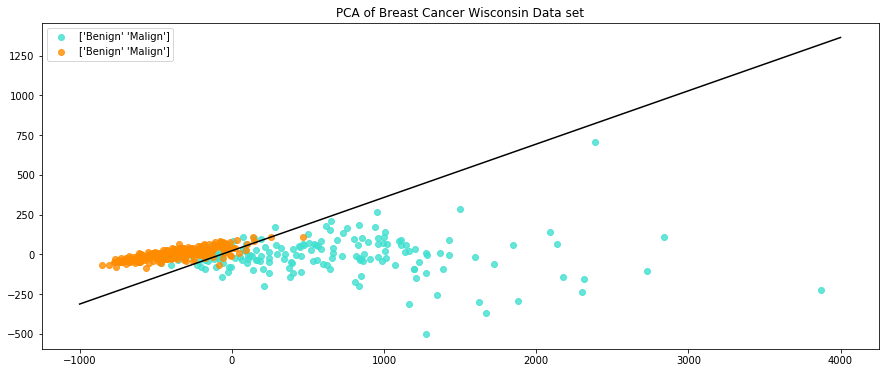

In [11]:
#Reducimos dimensionalidad de los datos ya que con kernel se amplio esa dimension
pca = PCA(n_components=2)
Xr1 = pca.fit(Xtr).transform(Xtr)

plt.figure()
colors = ['turquoise', 'darkorange']
lw = 1
target_names = np.array(['Benign','Malign'],dtype='<U10')
for color, i, target_name in zip(colors, [0,1], target_names):
    plt.scatter(Xr1[ytr == i, 0], Xr1[ytr == i, 1], color=color, alpha=.8, lw=lw,
                label=target_names)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of Breast Cancer Wisconsin Data set')

#After PCA for dimensional reduction

C = 1.0  # SVM regularization parameter
clf = svm.SVC(kernel = 'linear',  gamma=0.7, C=C )
clf.fit(Xr1, ytr)

w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-1000, 4000)
yy = a * xx - (clf.intercept_[0]) / w[1]

plt.plot(xx, yy, 'k-')
plt.show()

In [31]:
from sklearn.svm import SVR
svr=SVR(kernel='linear', C=1.0, epsilon=0.2)
svr.fit(Xtr, ytr)
pred_y=svr.predict(Xts)

array([ 0.48232249,  0.00216953,  1.04582257,  0.02220174,  0.51897583,
        0.06257724,  0.9380216 ,  0.98510086,  0.47827624,  0.2365567 ,
        0.19419992,  0.92774127,  0.62587333,  0.46929997,  0.99852707,
        0.64597661,  0.95184162,  0.63827446,  1.09469744,  0.73975484,
        1.11173219,  0.90131633,  0.87410854,  0.44220097, -0.07168917,
        1.00700612,  0.97697382,  0.68319785,  0.68162288,  0.1827981 ,
        0.89116947,  1.01668193,  0.89372226,  0.74520825,  0.66260221,
        0.86563505,  0.7629869 , -0.03818151,  0.92728419,  0.32209353,
        0.92267639, -0.18512253,  0.89814952,  0.9526672 ,  0.81570158,
       -0.00271379,  0.07006256, -0.00745905,  0.98593685, -0.22649247,
        0.85458659,  0.86377544,  0.95326535,  0.1630659 ,  0.9096313 ,
       -0.12008039,  1.06672727, -0.54217466,  1.0629603 ,  0.31745308,
        1.05259312,  1.03921917,  0.59323872,  1.09464716,  1.07853917,
        0.98652433,  1.21227869,  0.94880166, -0.19101342,  0.99